# Comparison with market data

In [1]:
import numpy as np
from frh_fx import mpl, nig, frh, uts, sim, blk
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
mpl.config(scale=1.5,print_keys=False)

In [3]:
date = '20170929'
pair1,pair2,pair3 = 'EURUSD','GBPUSD','EURGBP'

In [4]:
T1,Δ1,σ11 = uts.import_data(pair1,date)
T2,Δ2,σ22 = uts.import_data(pair2,date)
T3,Δ3,σ33 = uts.import_data(pair3,date)
k1 = uts.convert_deltas(T1,Δ1,σ11)
k2 = uts.convert_deltas(T2,Δ2,σ22)
k3 = uts.convert_deltas(T3,Δ3,σ33)

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots


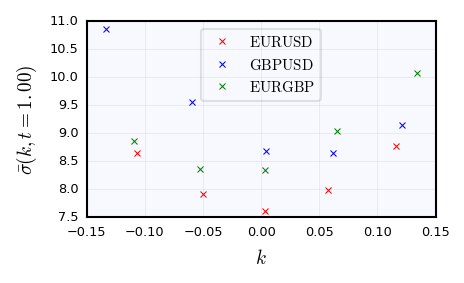

In [5]:
i = -1
plot,axes = plt.subplots()
axes.plot(k1[i,:],100*σ11[i,:],'rx')
axes.plot(k2[i,:],100*σ22[i,:],'bx')   
axes.plot(k3[i,:],100*σ33[i,:],'gx')   
axes.legend([r'$\mathrm{EURUSD}$',
             r'$\mathrm{GBPUSD}$',
             r'$\mathrm{EURGBP}$'])
axes.set_xlabel(r'$k$')
axes.set_ylabel(r'$\bar{\sigma}(k,t=%.2f)$'%T1[i])
uts.save_plot()

In [6]:
σ1,ρ1 = 0.082, 0.0
σ2,ρ2 = 0.095,-0.2
γ = 1
ρ = 0.48

In [7]:
α1,β1,δ1,μ1 = frh.nig_params(σ1,ρ1,γ)
α2,β2,δ2,μ2 = frh.nig_params(σ2,ρ2,γ)

In [8]:
θ1 = α1,β1,δ1
θ2 = α2,β2,δ2
α3,β3,δ3,μ3 = nig.cross_params(θ1,θ2,ρ)
θ3 = α3,β3,δ3

In [9]:
T = np.array([1])
k = uts.get_logstrikes(T)

In [10]:
P1 = nig.price(k,T,θ1)
P2 = nig.price(k,T,θ2)
P3 = nig.price(k,T,θ3)

In [11]:
BS1 = blk.surface(k,T,P1)
BS2 = blk.surface(k,T,P2)
BS3 = blk.surface(k,T,P3)

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/plots


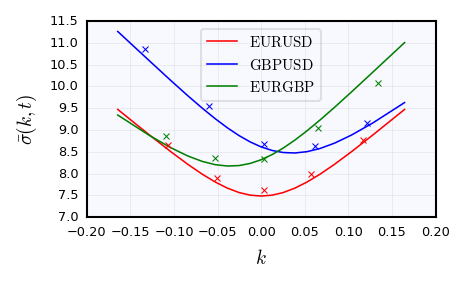

In [12]:
plot,axes = plt.subplots()
i = -1
axes.plot(k[i,:],100*BS1[i,:],'r')
axes.plot(k[i,:],100*BS2[i,:],'b')    
axes.plot(k[i,:],100*BS3[i,:],'g')
axes.plot(k1[i,:],100*σ11[i,:],'rx')
axes.plot(k2[i,:],100*σ22[i,:],'bx')   
axes.plot(k3[i,:],100*σ33[i,:],'gx')    
axes.legend([r'$\mathrm{EURUSD}$',
             r'$\mathrm{GBPUSD}$',
             r'$\mathrm{EURGBP}$'])
axes.set_xlabel(r'$k$')
axes.set_ylabel(r'$\bar{\sigma}(k,t)$')
uts.save_plot()

*Needless to say I have not worked particularly hard on this -- clearly a scipy.optimize solver could do better. Could also do with showing bid and offer.*

In [13]:
uts.save_data(k,T,BS3)

Saved at: /Users/ryanmccrickerd/gdrive/rypy/frh-fx/data/20180522-183200
